In [74]:
#imports
#numpy, pandas, scipy, math, matplotlib, seaborn
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
from math import sqrt
import matplotlib.pyplot as plt
from sklearn import preprocessing

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import svm
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Feature Importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#cross validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [13]:
cd "C:\Users\arang\Documents\Machine learning\Módulo 5\Entregable 3"

C:\Users\arang\Documents\Machine learning\Módulo 5\Entregable 3


In [14]:
credit = pd.read_csv('default of credit card clients.csv', header=1)
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Cleaning and preprocessing

In [15]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
DEFAULT      30000 non-null int64
dtypes: int64(25)
memory usage: 5.7 MB


In [16]:
credit.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [17]:
credit = credit.drop('ID', axis = 1)

In [18]:
credit.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULT      0
dtype: int64

## No missing values to process

In [19]:
def ageBracket(x):
    if x < 30:
        return 1
    elif x < 40:
        return 2
    elif x < 50:
        return 3
    elif x < 60:
        return 4
    else:
        return 5
credit['AGE']= credit['AGE'].apply(ageBracket)

In [20]:
def eduBracket(x):
    if x == 0 or x == 4 or x == 5 or x == 6:
        return 0
    else:
        return x
credit['EDUCATION']= credit['EDUCATION'].apply(eduBracket)

In [21]:
credit

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,1,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,1,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,2,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,2,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,4,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,2,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,3,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,2,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,3,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


## Data cleaning and pre-processing end 

## Correlation and covariance

In [22]:
creditCorr = credit.corr()
print(creditCorr)

           LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE     PAY_0  \
LIMIT_BAL   1.000000  0.024755  -0.245297 -0.108139  0.133936 -0.271214   
SEX         0.024755  1.000000   0.008144 -0.031389 -0.084403 -0.057643   
EDUCATION  -0.245297  0.008144   1.000000 -0.146705  0.178578  0.132036   
MARRIAGE   -0.108139 -0.031389  -0.146705  1.000000 -0.401122  0.019917   
AGE         0.133936 -0.084403   0.178578 -0.401122  1.000000 -0.036889   
PAY_0      -0.271214 -0.057643   0.132036  0.019917 -0.036889  1.000000   
PAY_2      -0.296382 -0.070771   0.155089  0.024199 -0.046014  0.672164   
PAY_3      -0.286123 -0.066096   0.148547  0.032688 -0.047732  0.574245   
PAY_4      -0.267460 -0.060173   0.140184  0.033122 -0.045440  0.538841   
PAY_5      -0.249411 -0.055064   0.125987  0.035629 -0.049793  0.509426   
PAY_6      -0.235195 -0.044008   0.115256  0.034345 -0.044577  0.474553   
BILL_AMT1   0.285430 -0.033642  -0.007782 -0.023472  0.052355  0.187068   
BILL_AMT2   0.278314 -0.0

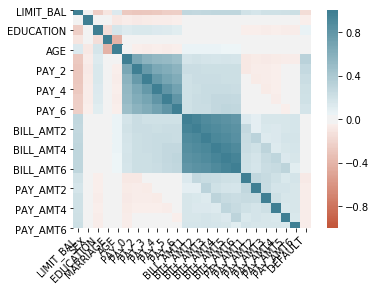

In [23]:
ax = sns.heatmap(
    creditCorr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [24]:
covMat = credit.cov()
print(covMat)

              LIMIT_BAL          SEX     EDUCATION     MARRIAGE           AGE  \
LIMIT_BAL  1.683446e+10  1571.050630 -23185.367949 -7323.669658  16872.965059   
SEX        1.571051e+03     0.239247      0.002902    -0.008014     -0.040085   
EDUCATION -2.318537e+04     0.002902      0.530692    -0.055784      0.126312   
MARRIAGE  -7.323670e+03    -0.008014     -0.055784     0.272452     -0.203290   
AGE        1.687297e+04    -0.040085      0.126312    -0.203290      0.942735   
PAY_0     -3.954593e+04    -0.031685      0.108094     0.011683     -0.040251   
PAY_2     -4.603765e+04    -0.041442      0.135258     0.015122     -0.053487   
PAY_3     -4.443225e+04    -0.038694      0.129518     0.020421     -0.055469   
PAY_4     -4.057181e+04    -0.034411      0.119395     0.020213     -0.051582   
PAY_5     -3.667056e+04    -0.030521      0.104004     0.021074     -0.054786   
PAY_6     -3.509308e+04    -0.024754      0.096556     0.020616     -0.049773   
BILL_AMT1  2.727020e+09 -121

The correlation and covariance matriz doesn't show any strong relationship between the features and the dependent variable, there seems to be a small positive correlation between the loan limit and the default but its not significant.

## EDA

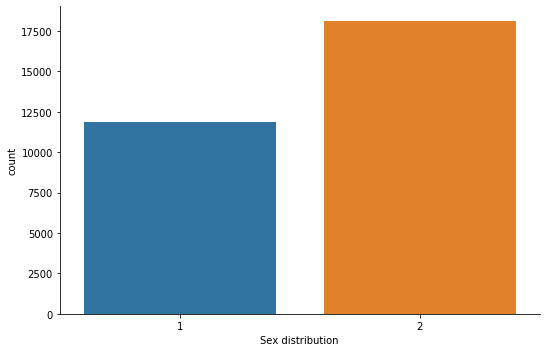

In [25]:
fg = sns.catplot('SEX', data=credit, kind='count', aspect=1.5)
fg.set_xlabels('Sex distribution')

As stated on a previous similar graph, the sex distribution shows a greater % of female customers.

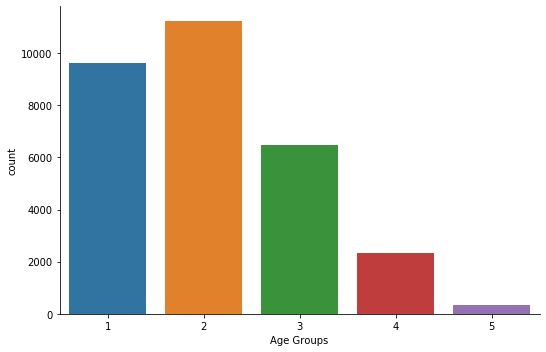

In [26]:
fg = sns.catplot('AGE', data=credit, kind='count', aspect=1.5)
fg.set_xlabels('Age Groups')

Again, with a clearer visualization is easy to see that the large majority of the observations belong to young customers in the 20-40 brackets

In [27]:
credit.groupby(['SEX','AGE'])['SEX'].count()

SEX  AGE
1    1      3281
     2      4565
     3      2771
     4      1092
     5       179
2    1      6337
     2      6673
     3      3693
     4      1249
     5       160
Name: SEX, dtype: int64

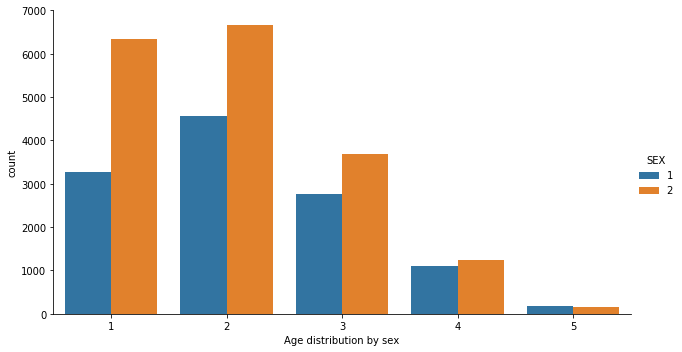

In [28]:
g = sns.catplot('AGE', data=credit, hue='SEX', kind='count', aspect=1.75)
g.set_xlabels('Age distribution by sex')

This graph helps us to start defining a customer profile, from here we can tell most of the customers are females in their 30s to 40s, and there are more women than men on all age groups.

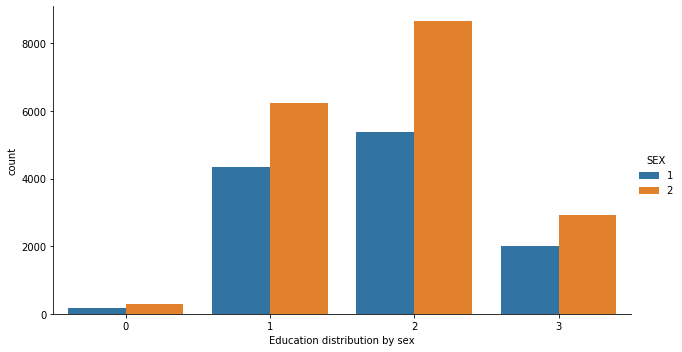

In [29]:
g = sns.catplot('EDUCATION', data=credit, hue='SEX', kind='count', aspect=1.75)
g.set_xlabels('Education distribution by sex')

Furthermore, most of the customers are females with college or highschool level education and then a slightly smaller population of grauate level education.

## Total of loans defaulted by sex and age group

In [30]:
credit['DEFAULT'] = credit['DEFAULT'].astype('int64')
credit['AGE'] = credit['AGE'].astype('int64')
credit.pivot_table('DEFAULT', 'SEX', 'AGE', aggfunc=np.sum, margins=True)

AGE,1,2,3,4,5,All
SEX,,,,,,
1,789,1050,691,295,48,2873
2,1408,1226,794,287,48,3763
All,2197,2276,1485,582,96,6636


The pivot tables are very valuable to show aggregation of categories and how they correlate to defaulted loans, from the above we can see that the age group with the highest count of defaulted loans is the 30-40 bracket, furthermore even though there is a significant population count for males vs females in that bracket, the amount of defaulted loans by gender stays very similar except in age group one were there is a dramatic difference

## Total of loans defaulted by sex and education bracket

In [31]:
credit.pivot_table('DEFAULT', 'SEX', 'EDUCATION', aggfunc=np.sum, margins=True)

EDUCATION,0,1,2,3,All
SEX,,,,,
1,14,906,1408,545,2873
2,19,1130,1922,692,3763
All,33,2036,3330,1237,6636


Using a similar approach based on education it can be seen that overall, people of graduate level education tend to default less loans, however this number needs to be compared against the % of the total of loans for the bracket

# Category plot for defaulted loans vs not defaulted

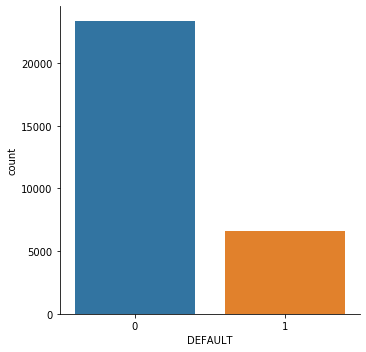

In [32]:
sns.catplot('DEFAULT', data=credit, kind='count')

The bar show us that the defaulted loans represent about 20% of the provided dataset, this is an alarmingly high number and clearly shows that the current mechanism to approve loans has failings.

## Total of loans defaulted by sex and marital status

In [33]:
credit.pivot_table('DEFAULT', 'SEX', 'MARRIAGE', aggfunc=np.sum, margins=True)

MARRIAGE,0,1,2,3,All
SEX,,,,,
1,2,1346,1485,40,2873
2,3,1860,1856,44,3763
All,5,3206,3341,84,6636


Looking for other interesting trends in the data we compared the loans defaulted by married people vs those defaulted by single people for both sexes, there doesn't seem to be a marked difference on loan defaulting based on marital status

## Total of loans defaulted by education and marital status

In [34]:
credit.pivot_table('DEFAULT', 'EDUCATION', 'MARRIAGE', aggfunc=np.sum, margins=True)

MARRIAGE,0,1,2,3,All
EDUCATION,,,,,
0,NaN,17.0,16.0,0.0,33
1,0.0,769.0,1254.0,13.0,2036
2,1.0,1666.0,1619.0,44.0,3330
3,4.0,754.0,452.0,27.0,1237
All,5.0,3206.0,3341.0,84.0,6636


This pivot shows several interesting insights to consider moving forward, the amount of loans defaulted is very similar for single people of highschool or graduate education level, this is surprising considering the significant difference of overall observations between the two groups, there is also a marked increase in defaulting for graduate level people from single to married and and inverse behavior for highschool level customers, it may be worth investigating further into these trends moving forward.

## Loan value distrubution 

Text(0.5, 1.0, 'Distribution of Loan Values')

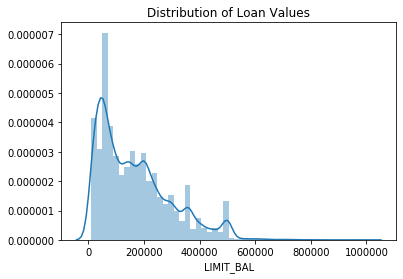

In [35]:
loan_dist = sns.distplot(credit['LIMIT_BAL'])
loan_dist.set_title("Distribution of Loan Values")

The distribution confirms the vast majority of the loans fall below the 100000$ mark but there is still a considerable amount of observations in the 100k to 300k range

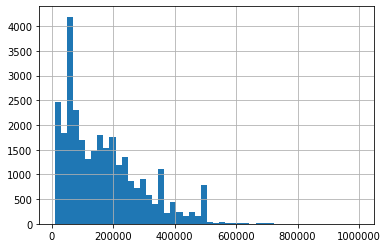

In [36]:
credit['LIMIT_BAL'].hist(bins=50)

## #Distribution of defaulted and not defaulted loans by sex and age group

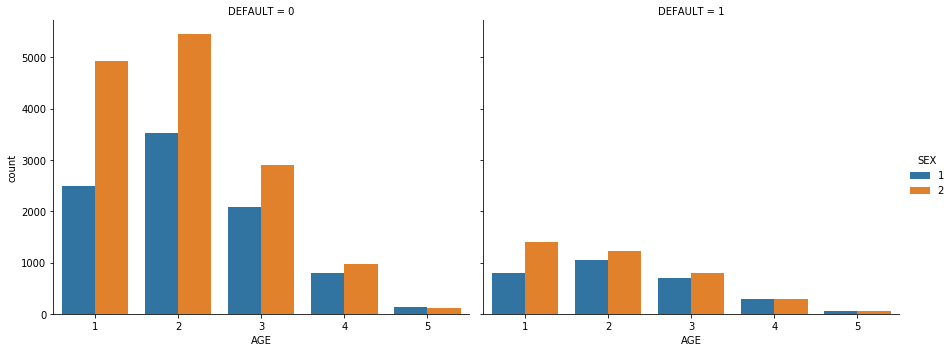

In [37]:
sns.catplot('AGE', data=credit, kind='count', hue='SEX', col='DEFAULT', order=[1,2,3,4,5], 
               hue_order=[1,2], aspect=1.25, height=5)

From the graph above it can be seen that defaulting is more common on the younger age brackets, with the 40-50 bracket trailing slightly behind but still having high numbers, while bracket 4 and 5 low numbers can be atributed to lower number of observationa dn generally better economic postion later in life.

## Distribution of loans by age group

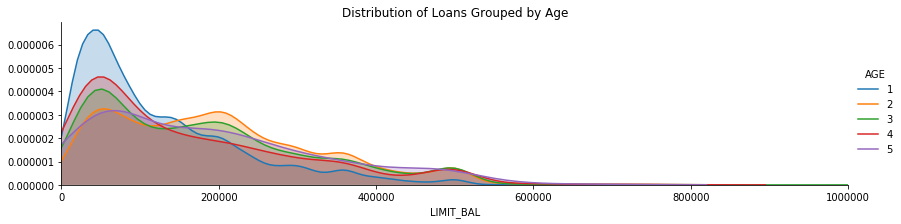

In [38]:
fig = sns.FacetGrid(credit, hue='AGE', aspect=4)
fig.map(sns.kdeplot, 'LIMIT_BAL', shade=True)
oldest = credit['LIMIT_BAL'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Loans Grouped by Age')
fig.add_legend()

Most of the small loans are attributed to age group 1 and 4, while the 30-40 brackets has a spike on the high end loans from 200000 and up. This same ahe group also happens to have the highest % of defaulting which could potentially correlate to the amount on loan.

## Distribution of loans by sex

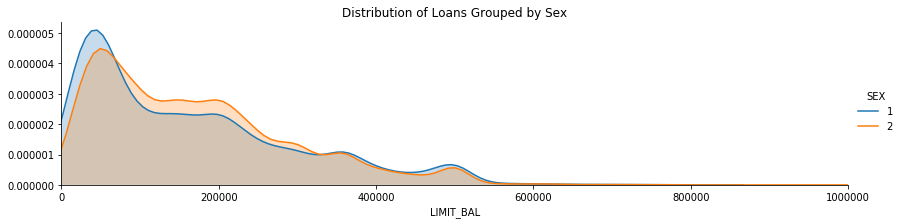

In [39]:
fig = sns.FacetGrid(credit, hue='SEX', aspect=4)
fig.map(sns.kdeplot, 'LIMIT_BAL', shade=True)
oldest = credit['LIMIT_BAL'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Loans Grouped by Sex')
fig.add_legend()

Males have a slighty higher percentage of the small loans, while women take a bigger share of the high value loans around 100000 and up. This data added with the previous graphic would suggest that women in their 30-40 with loans over 100000 represent the biggest risk population for loan defaulting.

## Distribution of loans by education level

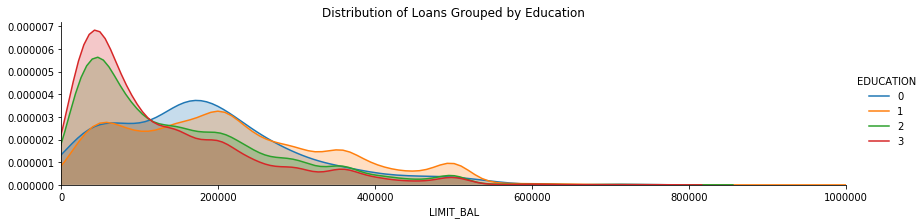

In [40]:
fig = sns.FacetGrid(credit, hue='EDUCATION', aspect=4)
fig.map(sns.kdeplot, 'LIMIT_BAL', shade=True)
oldest = credit['LIMIT_BAL'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Loans Grouped by Education')
fig.add_legend()

Graduate level population represents the smallest share of loans under 100000, and then overtakes all other demographics around the 200000 mark, this hints a the higher economic power of people with advanced degrees helping them secure bigger loans. There is an interesting peak around the 200000 mark for people with undefined education level, since this bracket represents a very small portion of the observations, it should be discussed if that may represent an anomaly value and should be removed.

## Distribution of defaulted loans by loan value

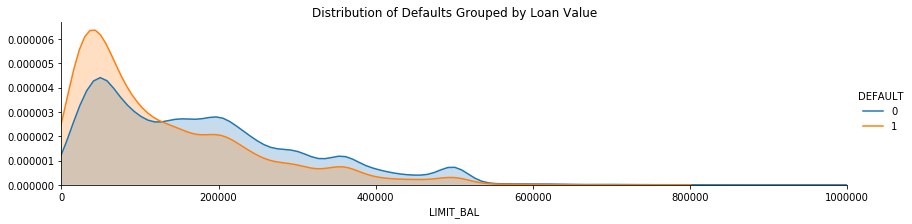

In [41]:
fig = sns.FacetGrid(credit, hue='DEFAULT', aspect=4)
fig.map(sns.kdeplot, 'LIMIT_BAL', shade=True)
oldest = credit['LIMIT_BAL'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Defaults Grouped by Loan Value')
fig.add_legend()

As expected due to the amount of small loans in the observations, most of the defaulted loans were found in that same category, with the amount of defaulting seeming to be at least double of the one found at the 200000 mark and up. Although this would suggest smaller loans are in higher risk of being defaulted, there is a lot more observations of small loans, before making this assumption % of defaulted loas in relation to total loans around the amounts should be considered.

## Marital status by age group

In [42]:
port = pd.crosstab(index=[credit.AGE], columns=[credit.MARRIAGE])
port.columns = [['Married','Single','Divorced','Other']]
port

,Married,Single,Divorced,Other
AGE,,,,
1,10,1482,8092,34
2,22,5516,5624,76
3,15,4652,1662,135
4,7,1732,531,71
5,0,277,55,7


## Defaulted vs education level grouped by gender

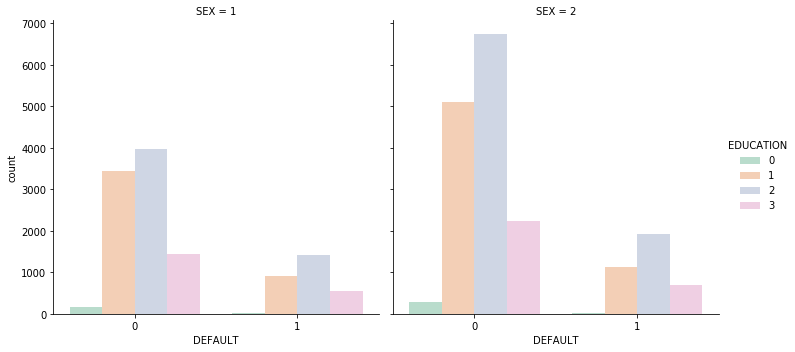

In [43]:
sns.catplot('DEFAULT', data=credit, hue='EDUCATION', kind='count', palette='Pastel2', hue_order=range(0,4),
              col='SEX')

This graphic helps us build some initial assumptions to start our analysis with as it compiles several features together. Form it we can confirm a hypothesis developed previously, it looks like college level women represent the demographic with the highest percentage of defaulted loans.

## Age factor on defaulting

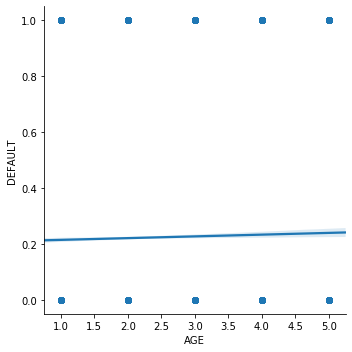

In [44]:
sns.lmplot('AGE', 'DEFAULT', data=credit)

There is a ver slight increase in deafulting probabilty as age increases but it's not significant.

# Defaulting vs age grouped by sex

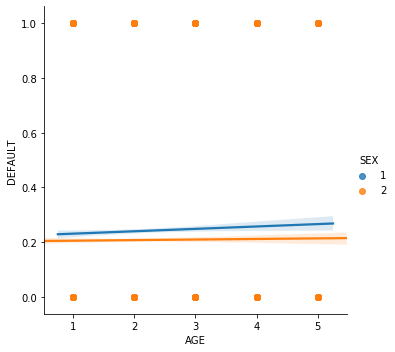

In [45]:
sns.lmplot('AGE', 'DEFAULT', data=credit, hue='SEX')

Then mentioned increase in default probablity seems to impact men more than it does women, although the variance is very small, there is a visible trend but is too weak to justify investigating further.

## Defaulting vs age grouped by education level

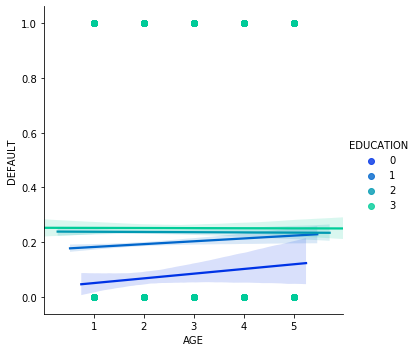

In [46]:
sns.lmplot('AGE', 'DEFAULT', hue='EDUCATION', data=credit, palette='winter', hue_order=range(0,4))

The most pronounced observation from this graphic is how default probabily increases with age for a demographic without formal education. This would imply that older generations without a degree have a risker economic position.

# RFE

In [47]:
credit['SEX'] = credit['SEX'].astype('category')
credit['MARRIAGE'] = credit['MARRIAGE'].astype('category')
credit['AGE'] = credit['AGE'].astype('category')
credit['EDUCATION'] = credit['EDUCATION'].astype('category')
credit['PAY_0'] = credit['PAY_0'].astype('category')
credit['PAY_2'] = credit['PAY_2'].astype('category')
credit['PAY_3'] = credit['PAY_3'].astype('category')
credit['PAY_4'] = credit['PAY_4'].astype('category')
credit['PAY_5'] = credit['PAY_5'].astype('category')
credit['PAY_6'] = credit['PAY_6'].astype('category')
credit['DEFAULT'] = credit['DEFAULT'].astype('category')

In [137]:
X = credit.drop('DEFAULT', axis=1)
target = credit['DEFAULT']

rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X, target)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=101,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [138]:
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 23


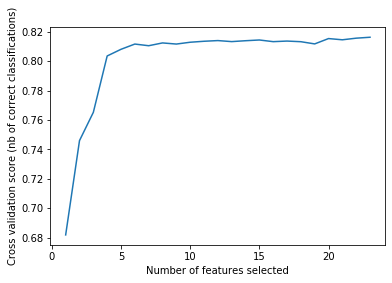

In [139]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

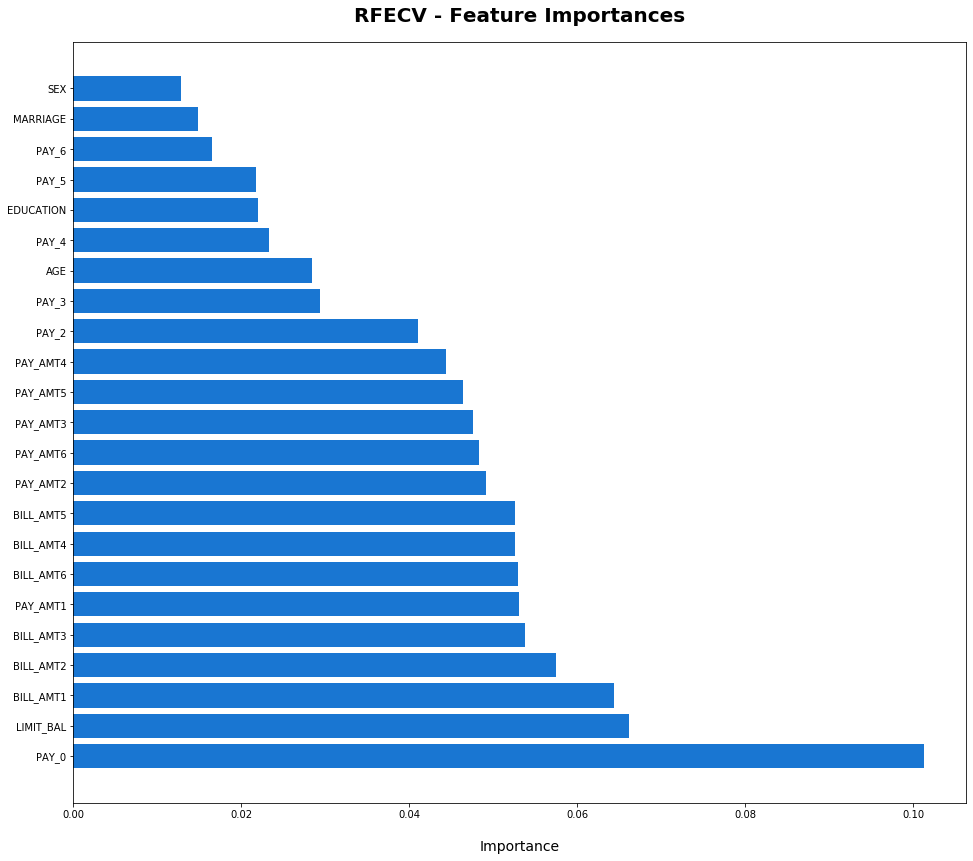

In [148]:
dset = pd.DataFrame()
dset['attr'] = X.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)


plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

Recursive feature selection couldn't find any features to remove, dataset will be used as it is

# ONE HOT ENCODING

One hot encoding won't be necessary, although there are several classifier features in the data set, these are already numeric, there is no need to encode.

# MODELING

a 30% sample of the dataset was to be used, but the processing times allow for using the whole set.

In [48]:
##creditSample = credit.sample(frac= 0.3, replace=True, random_state=1)
creditSample = credit

In [49]:
creditSample.shape

(30000, 24)

In [50]:
#features
features = creditSample.iloc[:,0:23]
print('Summary of feature sample')
features.head()

Summary of feature sample


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,1,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,1,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,2,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,2,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,4,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [51]:
depVar = creditSample['DEFAULT']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(features, depVar, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((22500, 23), (7500, 23), (22500,), (7500,))

# KNN

In [53]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.82
Accuracy of K-NN classifier on test set: 0.76


# LOGISTIC REGRESSION

In [54]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print('Accuracy of log regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of log regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of log regression classifier on training set: 0.78
Accuracy of log regression classifier on test set: 0.78


# RANDOM FOREST

In [55]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(rf.score(X_test, y_test)))

Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 0.81


# Models for context features only

The above models produce reasonably high performance metrics, however it uses information of previous loan payments to help predict if the loan will default on next payment, this problem can be abstracted one step further by removing the payment related variables and asking the question if we can predict a loan willbe defaulted based only on customer profile information.

In [56]:
featuresCtx = creditSample.iloc[:,0:5]
featuresCtx.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE
0,20000,2,2,1,1
1,120000,2,2,2,1
2,90000,2,2,2,2
3,50000,2,2,1,2
4,50000,1,2,1,4


In [57]:
depVar = creditSample['DEFAULT']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(featuresCtx, depVar, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((22500, 5), (7500, 5), (22500,), (7500,))

# KNN

In [59]:
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.76
Accuracy of K-NN classifier on test set: 0.73


# LOGISTIC REGRESSION

In [60]:
logreg.fit(X_train, y_train)
print('Accuracy of Log regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Log regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Log regression classifier on training set: 0.78
Accuracy of Log regression classifier on test set: 0.78


# RANDOM FOREST

In [61]:
rf.fit(X_train, y_train)
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(rf.score(X_test, y_test)))

Accuracy of RF classifier on training set: 0.79
Accuracy of RF classifier on test set: 0.76


# MODELS WITH PARAMETER TUNING

for model tuning a sample of the dataset will be used

In [62]:
featuresCtx = creditSample.iloc[:,0:5]
depVar = creditSample['DEFAULT']
X_train, X_test, y_train, y_test = train_test_split(featuresCtx, depVar, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((22500, 5), (7500, 5), (22500,), (7500,))

# LOGISTIC REGRESSION

In [66]:
logreg1 = LogisticRegression(penalty = 'l2', C = 0.1,random_state = 0)

logreg1.fit(X_train,y_train)
print(cross_val_score(logreg1, X_train, y_train)) 
logreg1.score(X_train,y_train)

print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(logreg1.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(logreg1.score(X_test, y_test)))

[0.77933333 0.77933333 0.77911111 0.77911111 0.77911111]
Accuracy of SVM classifier on training set: 0.78
Accuracy of SVM classifier on test set: 0.78


# RANDOM FOREST

In [67]:
rf1 = RandomForestClassifier(n_estimators=300, max_depth= 90)

rf1.fit(X_train, y_train)
print(cross_val_score(rf1, X_train, y_train)) 
rf1.score(X_train,y_train)

print('Accuracy of RF1 classifier on training set: {:.2f}'
     .format(rf1.score(X_train, y_train)))
print('Accuracy of RF1 classifier on test set: {:.2f}'
     .format(rf1.score(X_test, y_test)))

[0.75466667 0.76       0.76133333 0.76222222 0.76044444]
Accuracy of RF1 classifier on training set: 0.79
Accuracy of RF1 classifier on test set: 0.76


The random forest model does not show any accuracy improvement with the paremeters changed but it remains the model with the highest performance metrics.

# KNN

In [68]:
knn1 = KNeighborsClassifier(n_neighbors=7, leaf_size= 3)

knn1.fit(X_train, y_train)
print(cross_val_score(knn1, X_train, y_train)) 
knn1.score(X_train,y_train)

print('Accuracy of KNN1 classifier on training set: {:.2f}'
     .format(knn1.score(X_train, y_train)))
print('Accuracy of KNN1 classifier on test set: {:.2f}'
     .format(knn1.score(X_test, y_test)))

[0.74533333 0.74022222 0.75644444 0.74133333 0.74422222]
Accuracy of KNN1 classifier on training set: 0.77
Accuracy of KNN1 classifier on test set: 0.76


The KNN algorithm had an improvement of 0.01% in performance over the training set, this suggest that with more parameter tuning the accuracy could improve even more, however it still trail behind random forest in terms of overall performance.

# PREDICTIONS

RF is the algorithm with the best performing accuracy metric and so will be used for the model prediction

In [70]:
predictions = rf1.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: -0.387
RMSE: 0.490


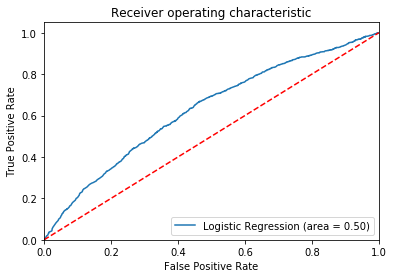

In [75]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()